### Importamos los datos

In [2]:
import pandas as pd
import numpy as np
import utils

In [3]:
airbnb_csv ='../data/raw/airbnb.csv'

df = pd.read_csv(airbnb_csv)

### 1 . Exploracion y limpieza superficial de los datos

1 . 1 . Exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

descripcion estadistica

In [5]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


numero de filas y columnas

In [6]:
print(f'Filas: {df.shape[0]}, Columnas : {df.shape[1]}')

Filas: 48895, Columnas : 16


nombres columnas

In [7]:
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


valores unicos en cada columna

In [8]:
print(df.nunique())


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


In [9]:
#Valores unicos por columna

numero_minimo = 10

for columna in df.columns:
    # Verifica si la columna tiene menos de 10 valores únicos
    if df[columna].nunique() < numero_minimo:
        # Imprime los valores únicos de la columna 'neighbourhood_group'
        print(f"Valores únicos de {columna}: {df[columna].unique()}")

Valores únicos de neighbourhood_group: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Valores únicos de room_type: ['Private room' 'Entire home/apt' 'Shared room']


In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Resumen:**

Entendemos las dimensiones y el conjunto de valores del dataframe donde:

- host_id  - Es el identificador del anfitrión
- host_name  -   es el nombre del anfitrión
- neighbourhood_group -  es el distrito de la propiedad
- neighbourhood   -  es el barrio de la propiedad
- room_type  -   es el tipo de propiedad
- minimum_nights   - noches minimas en las que estar en el apartamento
- number_of_reviews   -  numero de reviews hechas en la app
- last_review  - fecha de la ultima review
- reviews_per_month    - numero de reviews hechas en el ultimo mes
- calculated_host_listings_count  -  Es el numero de casas que tiene el mismo anfitrion siendo calculadas por la aplicacion
- availability_365  -  Numero de dias que esta disponible la habitación al año



1 . 2 . Limpieza superficial


copiamos el dataframe para no ser destructivos con los datos

In [11]:
clean_df = df.copy()

In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


eliminamos las columnas que suponemos que no nos dan valor

In [13]:
eliminar =['id', 'name', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count']
eliminar2 = ['reviews_per_month']

clean_df.drop(eliminar,axis=1,inplace=True)
clean_df.drop(eliminar2,axis=1,inplace=True)

In [14]:
clean_df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2


Buscamos los nans y los eliminamos en medida de lo posible

In [15]:
hay_nulos = clean_df.isnull().any().any()

if hay_nulos:
    print('Hay valores nulos')
else:
    print('NO hay valores nulos')

NO hay valores nulos


In [16]:
# Mostrar la cantidad de NaN por columna
nan_por_columna = clean_df.isnull().sum()

# Mostrar el resultado
print(nan_por_columna)


neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64


In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   neighbourhood        48895 non-null  object 
 2   latitude             48895 non-null  float64
 3   longitude            48895 non-null  float64
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   minimum_nights       48895 non-null  int64  
 7   number_of_reviews    48895 non-null  int64  
 8   availability_365     48895 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


### 2 . Analisis univariante

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

2 . 1 . Variables Categoricas

In [19]:
categoricas = clean_df.select_dtypes(include='object')


In [20]:
categoricas

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [21]:
counts = categoricas['neighbourhood'].value_counts()
neighbourhood_order = categoricas.loc[df['neighbourhood'].isin(counts.index)].sort_values(by='neighbourhood', key=lambda x: counts[x],ascending=False)


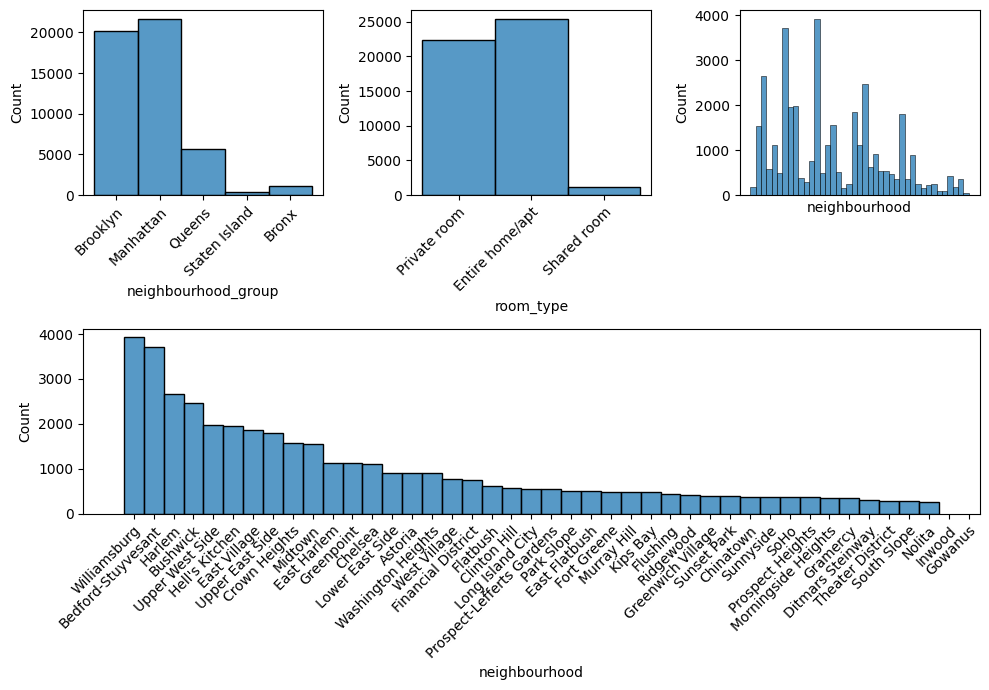

In [22]:
fig, axis = plt.subplot_mosaic([['a','b','d']
                                ,['c','c','c']],figsize = (10, 7))


# Create a multiple histogram
sns.histplot(ax=axis['a'],  data = categoricas, x = "neighbourhood_group") 
plt.setp(axis['a'].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") # Rotates the tags

sns.histplot(ax= axis['b'],  data = categoricas, x = "room_type") 
plt.setp(axis['b'].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") # Rotates the tags


sns.histplot(ax= axis['c'],  data = neighbourhood_order, x = "neighbourhood",binrange=(0,40)) 
plt.setp(axis['c'].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") # Rotates the tags

sns.histplot(ax= axis['d'],  data = categoricas, x = "neighbourhood",binrange=(0,40)) 
plt.setp(axis['d'].get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor") # Rotates the tags
axis['d'].set_xticks([])


plt.tight_layout()
plt.show()


Entendemos que hay 5 Distritos y dentro de ellos estan sus 221 barrios, en cada uno de ellos tenemos las casas de AirBNB en las que encontramos 3 tipos: Habitacion privada, Apartamento y habitacion compartida

2 . 2 . Variables numericas

In [23]:
numericas = clean_df.select_dtypes(include='number')

In [24]:
numericas

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
0,40.64749,-73.97237,149,1,9,365
1,40.75362,-73.98377,225,1,45,355
2,40.80902,-73.94190,150,3,0,365
3,40.68514,-73.95976,89,1,270,194
4,40.79851,-73.94399,80,10,9,0
...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,9
48891,40.70184,-73.93317,40,4,0,36
48892,40.81475,-73.94867,115,10,0,27
48893,40.75751,-73.99112,55,1,0,2


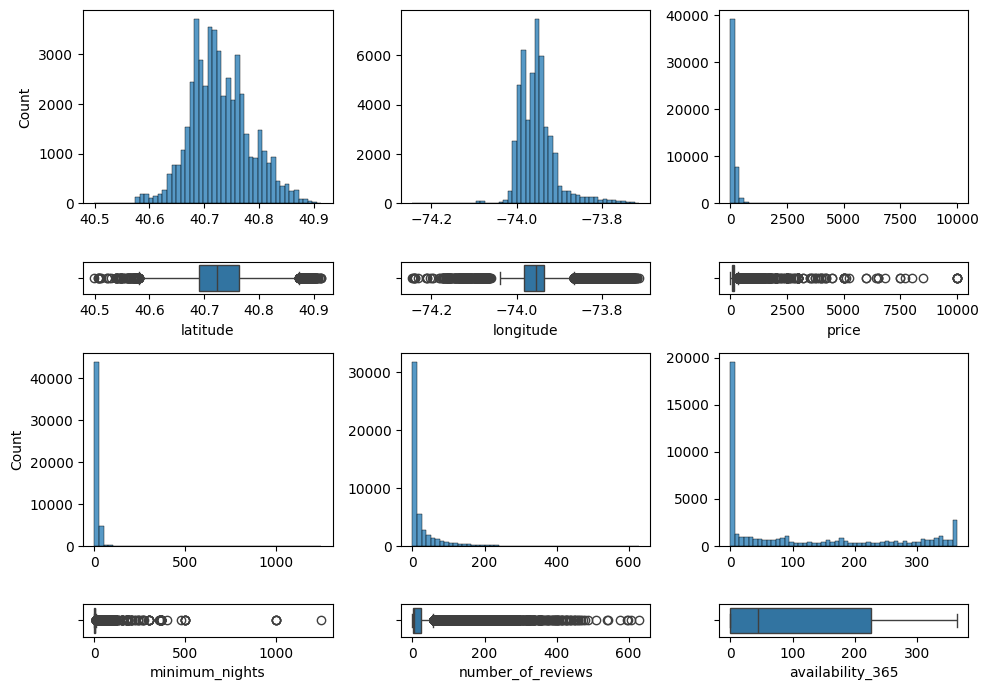

In [25]:
fig, axis = plt.subplot_mosaic([['h1','h2','h3'],
                                ['b1','b2','b3'],
                                ['h4','h5','h6'],
                                ['b4','b5','b6']], figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1,6,1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis['h1'], data = numericas, x = "latitude",bins=50).set(xlabel = None)
sns.boxplot(ax = axis['b1'], data = numericas, x = "latitude")

sns.histplot(ax = axis['h2'], data = numericas, x = "longitude",bins=50).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis['b2'], data = numericas, x = "longitude")

sns.histplot(ax = axis['h3'], data = numericas, x = "price",bins=50).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis['b3'], data = numericas, x = "price")

sns.histplot(ax = axis['h4'], data = numericas, x = "minimum_nights",bins=50).set(xlabel = None)
sns.boxplot(ax = axis['b4'], data = numericas, x = "minimum_nights")

sns.histplot(ax = axis['h5'], data = numericas, x = "number_of_reviews",bins=50).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis['b5'], data = numericas, x = "number_of_reviews")

sns.histplot(ax = axis['h6'], data = numericas, x = "availability_365",bins=50).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis['b6'], data = numericas, x = "availability_365")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Con las graficas podemos ver que tenemos diferentes outliers que hace que no podamos ver los valores con claridad.

- La mayor parte del precio oscila entre los 0 y los 175 dolares
- El 75% de las noches minimas estan por debajo de las 5 noches
- La mayor parte de las casas tienen menos de 20 reviews
- La disponibilidad de las casas varia entre todo el año teniendo un pico en las Ocupadas todo el año

### 3 . Analisis Multivariable

Para esta parte buscamos una variable interesante como **target** en nuestro caso, el precio


3 . 1 . Correlación entre variables Numerica - Numerica

In [26]:
numericas.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
0,40.64749,-73.97237,149,1,9,365
1,40.75362,-73.98377,225,1,45,355
2,40.80902,-73.94190,150,3,0,365
3,40.68514,-73.95976,89,1,270,194
4,40.79851,-73.94399,80,10,9,0


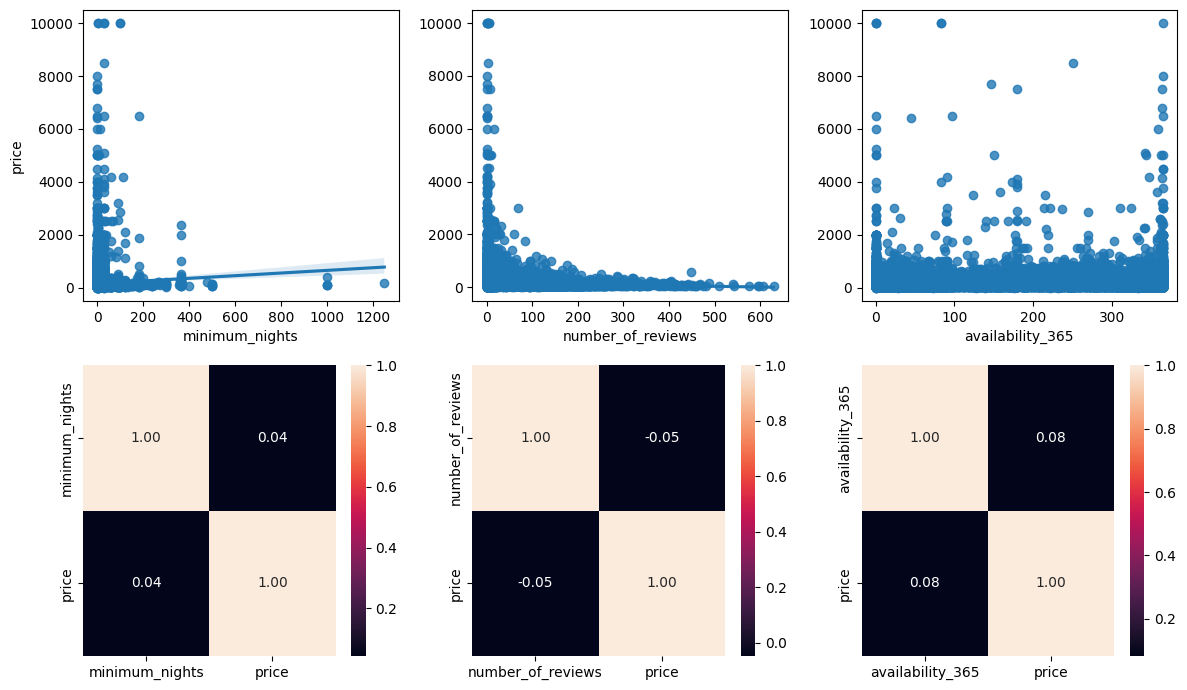

In [27]:
fig, axis = plt.subplot_mosaic([['a1','b1','c1'],
                                ['a2','b2','c2']], figsize = (12, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis['a1'], data = numericas, x = "minimum_nights", y = "price")
sns.heatmap(numericas[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])

sns.regplot(ax = axis['b1'], data = numericas, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(numericas[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis['b2'])

sns.regplot(ax = axis['c1'], data = numericas, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(numericas[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis['c2'])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Comprobamos que las variables numericas no afectan al precio

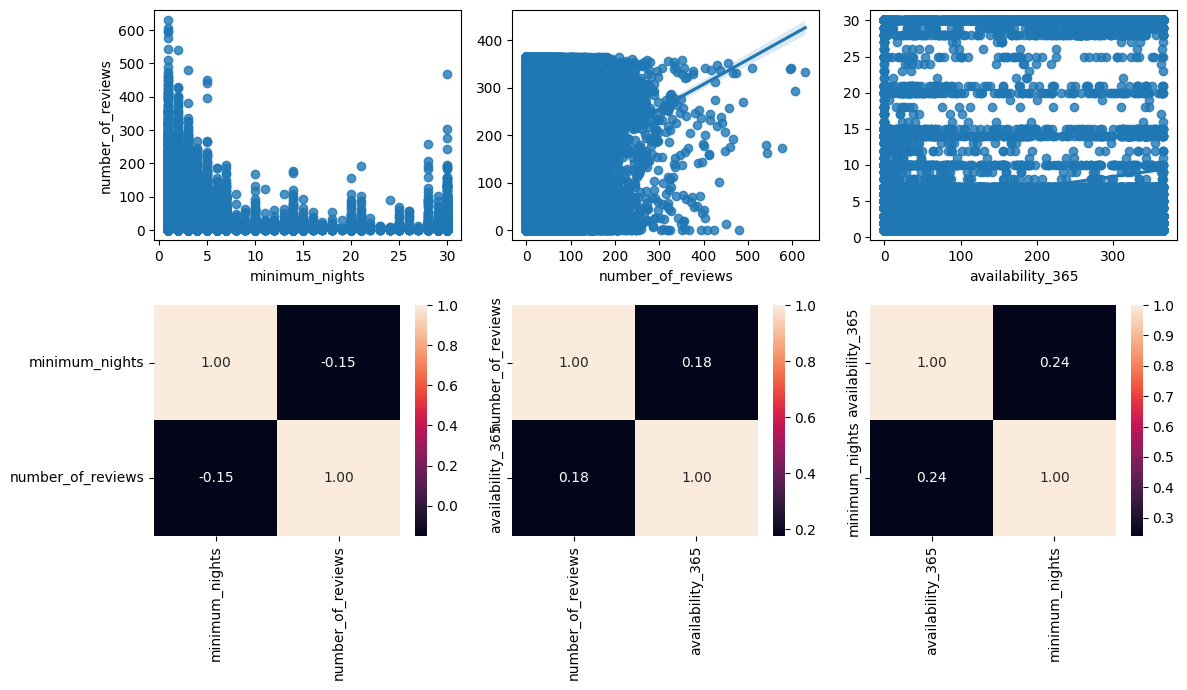

In [58]:
fig, axis = plt.subplot_mosaic([['a1','b1','c1'],
                                ['a2','b2','c2']], figsize = (12, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis['a1'], data = numericas, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(numericas[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis['a2'])

sns.regplot(ax = axis['b1'], data = numericas, x = "number_of_reviews", y = "availability_365").set(ylabel=None)
sns.heatmap(numericas[["number_of_reviews", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis['b2'])

sns.regplot(ax = axis['c1'], data = numericas, x = "availability_365", y = "minimum_nights").set(ylabel=None)
sns.heatmap(numericas[["availability_365", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis['c2'])


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Comprobamos entre sí las predictoras y comprobamos que ambas 3 estan algo relacionadas, aunque demasiado poco para ser concluyentes.  

Aprovechamos para plotear un mapa con las variables de latitud y longitud

In [28]:
precio_ordenado = clean_df.sort_values(by='price')
precio_ordenado

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,222
25634,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,127
25753,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,28
...,...,...,...,...,...,...,...,...,...
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,365
12342,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,83
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0


In [29]:
precio_ordenado.drop(precio_ordenado[precio_ordenado['price'] == 0].index,inplace=True)

In [30]:
precio_ordenado['log_price'] = np.log(precio_ordenado['price'])

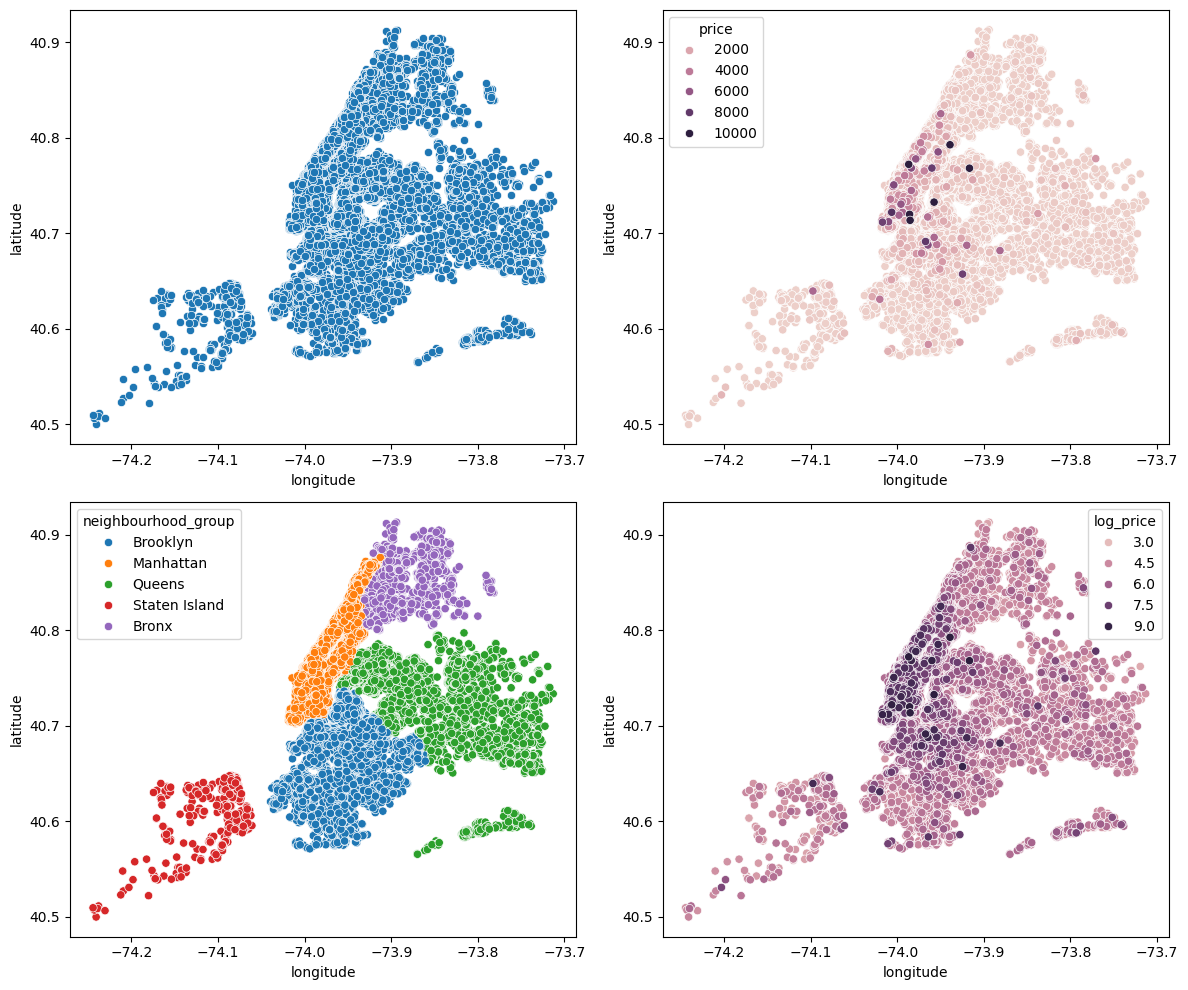

In [31]:
fig, axis = plt.subplot_mosaic([['a1','b1'],
                                ['a2','b2']], figsize = (12, 10))


sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a1'])
sns.scatterplot(x='longitude', y='latitude', data=clean_df, ax= axis['a2'], hue= 'neighbourhood_group')
sns.scatterplot(x='longitude', y='latitude', hue='price', data=precio_ordenado, ax=axis['b1'])
sns.scatterplot(x='longitude', y='latitude', hue='log_price', data=precio_ordenado, ax=axis['b2'])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

3 . 2 . Correlación entre variables Categorica - Categorica

In [32]:
categoricas.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


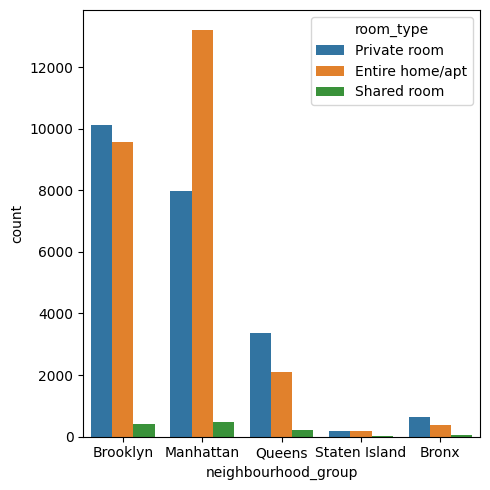

In [33]:
fig, axis = plt.subplot_mosaic([['c']], figsize = (5, 5))

sns.countplot(ax = axis['c'], data = categoricas, x = "neighbourhood_group", hue = "room_type")

plt.tight_layout()
plt.show()

Aqui podemos ver que Manhattan tiene mas de 12000 apartamentos completos y menos de 8000 habitaciones privadas.

3 . 3 . Correlación entre variables Numerica - Categorica

In [34]:
clean_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


Una de las relaciones interesantes seria el precio y la categoria del piso

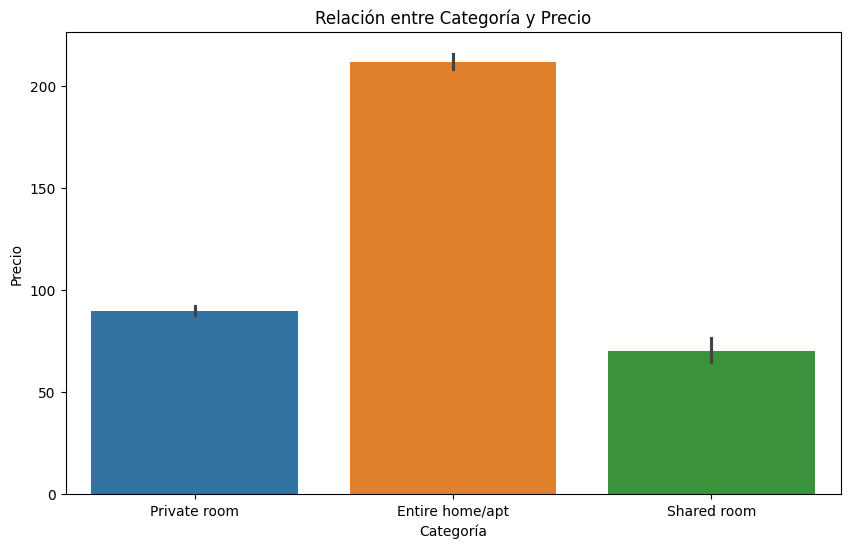

In [35]:
# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras
sns.barplot(x='room_type', y='price', data=clean_df, hue='room_type')

# Títulos y etiquetas
plt.title('Relación entre Categoría y Precio')
plt.xlabel('Categoría')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

3 . 4 . Correlacion entre todas las variables

In [36]:
clean_df["neighbourhood_group_n"] = pd.factorize(clean_df["neighbourhood_group"])[0]
clean_df["neighbourhood_n"] = pd.factorize(clean_df["neighbourhood"])[0]
clean_df["room_type_n"] = pd.factorize(clean_df["room_type"])[0]


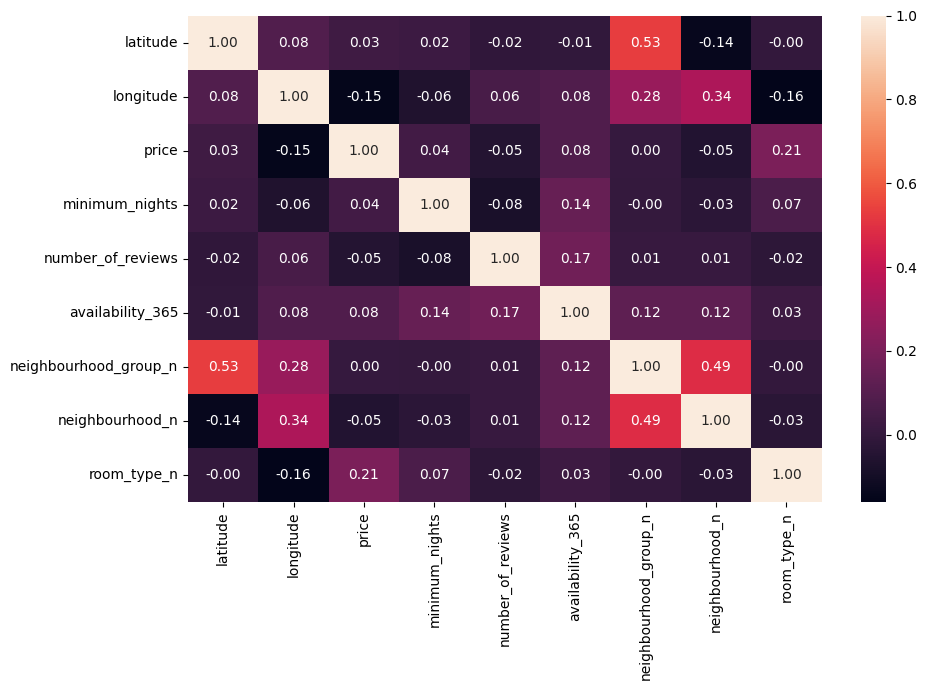

In [37]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(clean_df[["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "availability_365", "neighbourhood_group_n", "neighbourhood_n","room_type_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

En nuestra Target: El precio, apenas tiene relaciones con las demas columnas, siendo la columna que mas influye el tipo de casa disponible.

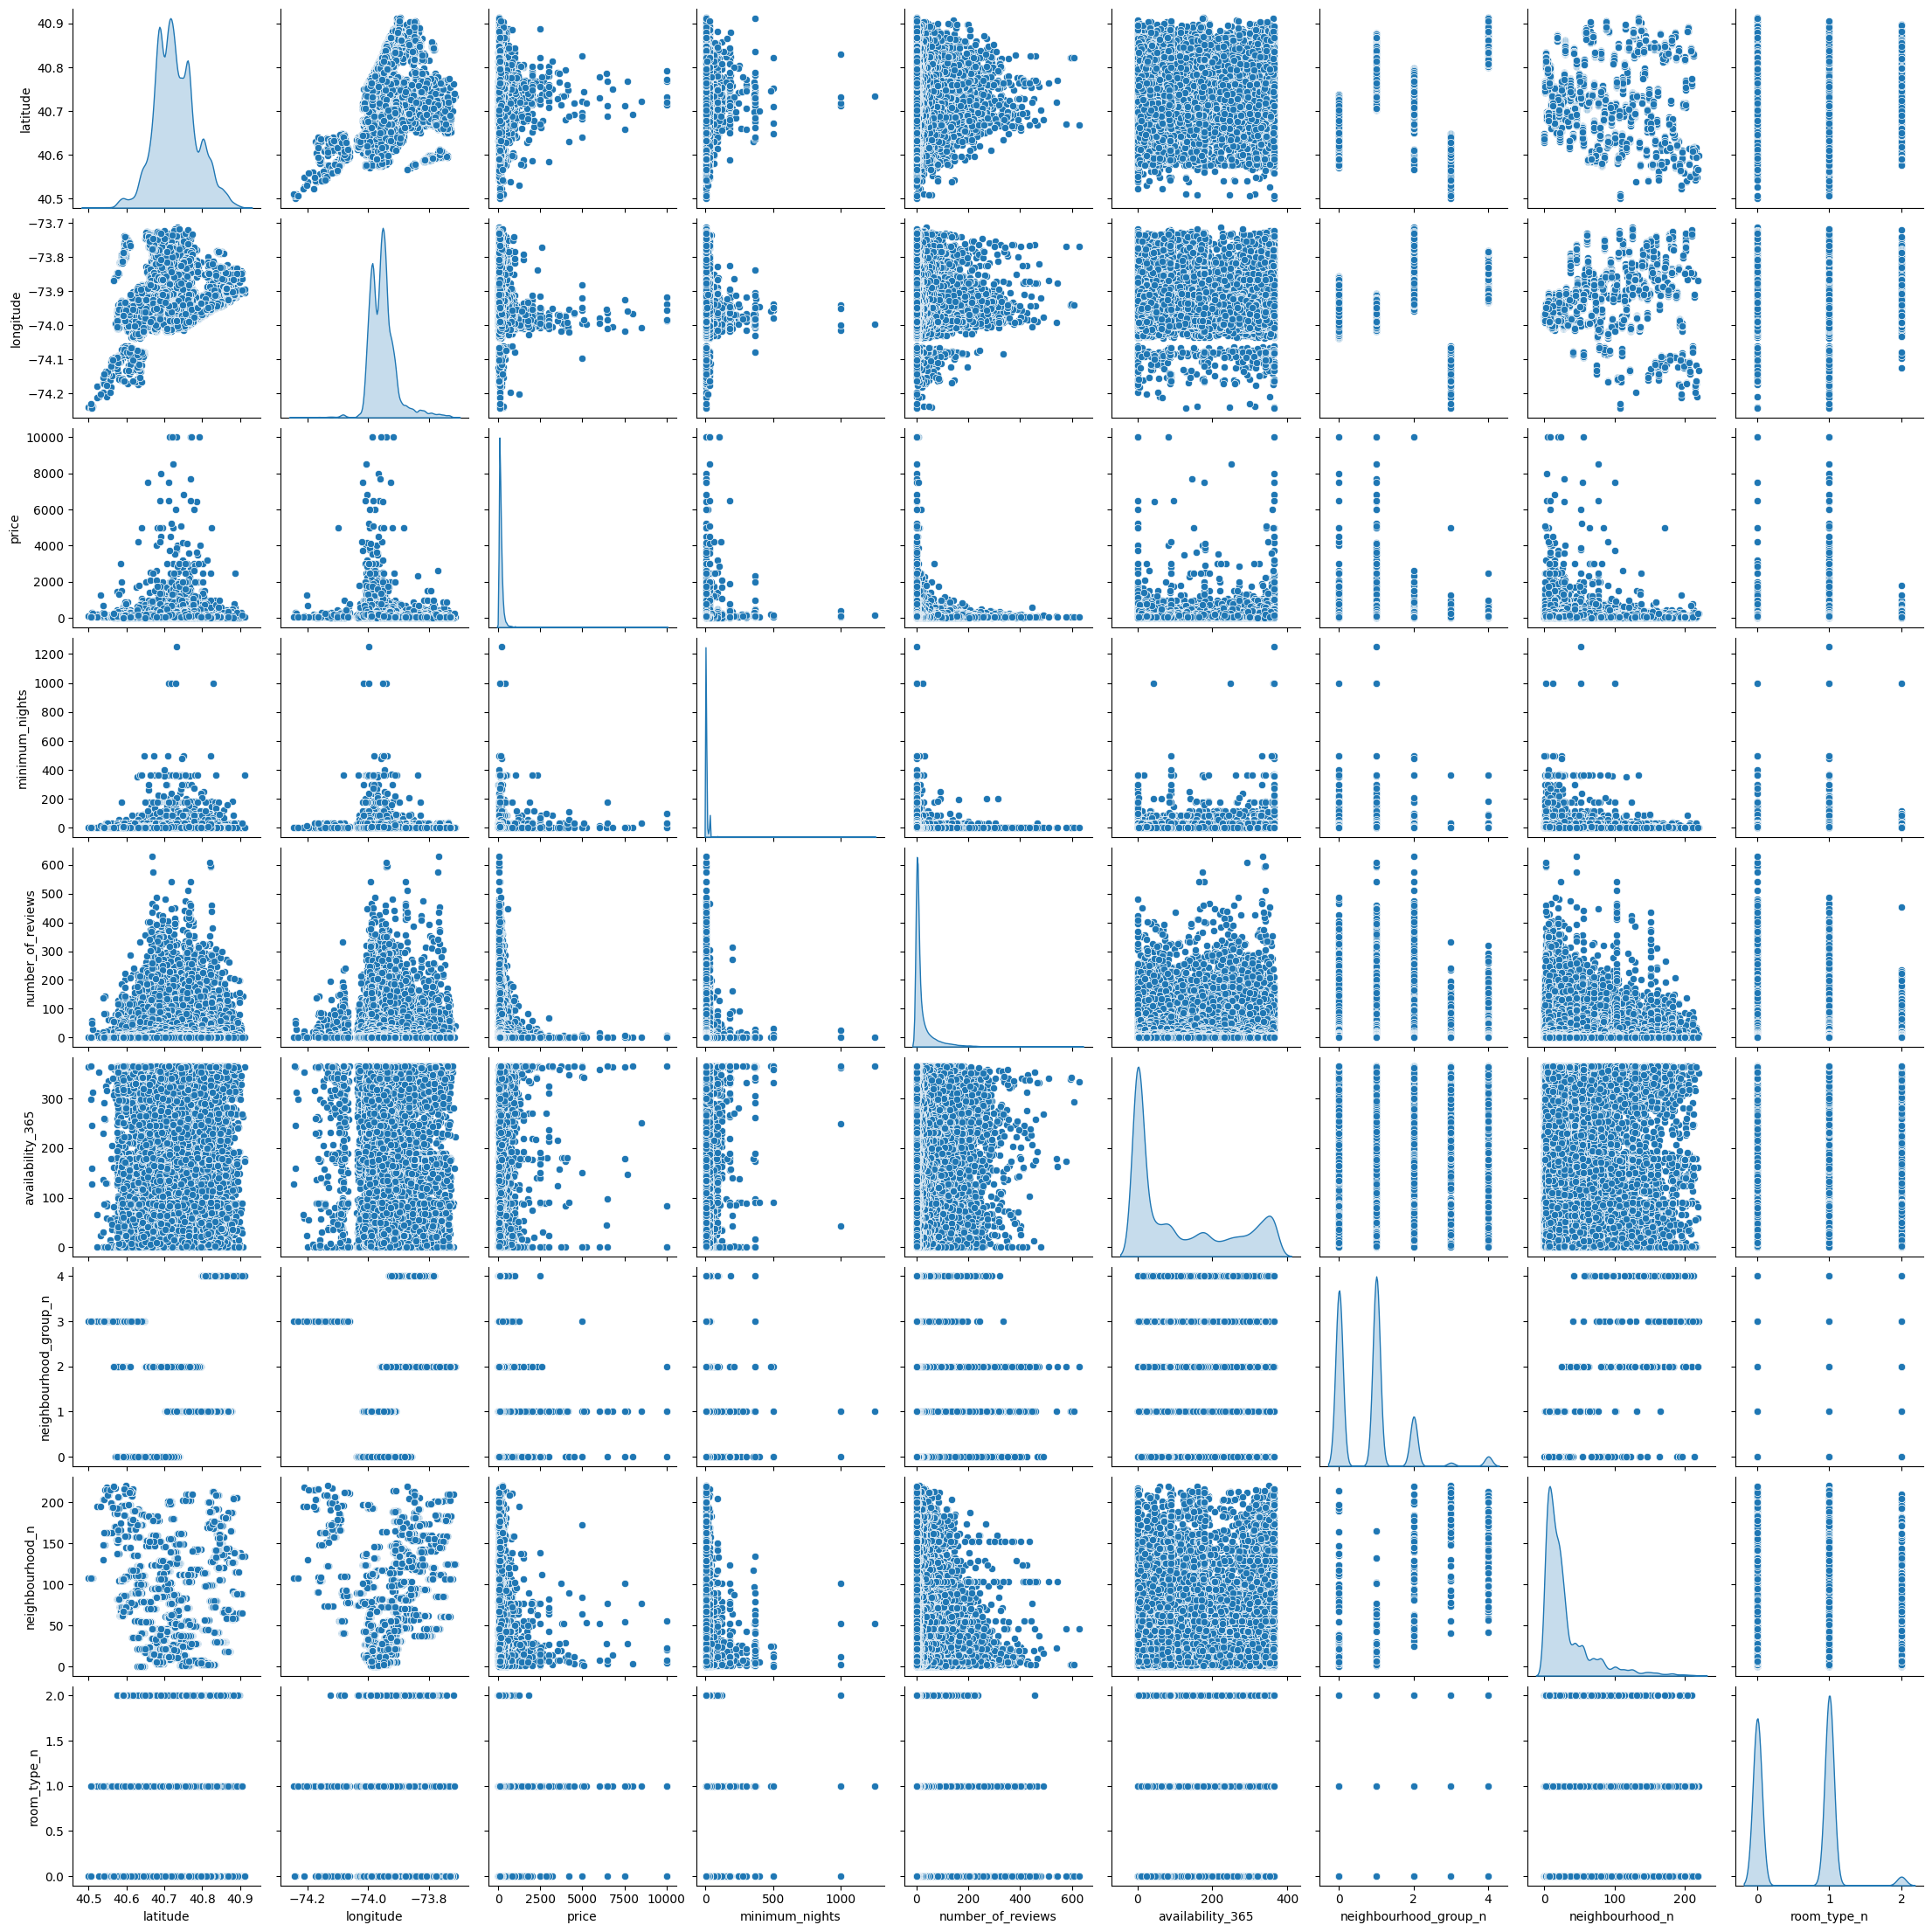

In [38]:
sns.pairplot(clean_df, diag_kind="kde")

### 4 . Feature Engineering

4 . 1 . Analisis de Outliers

In [39]:
numericas = clean_df.select_dtypes(include='number')

In [40]:
clean_df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,9,0,6,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,36,0,21,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,27,1,2,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2,1,7,2


In [41]:
clean_df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327,0.786911,29.888782,0.567113
std,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289,0.844386,34.676634,0.541249
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.000000,7.500000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000,1.000000,19.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000,1.000000,37.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000,4.000000,220.000000,2.000000


Podemos apreciar que:

- Tenemos casas con precio 0 
- Casas con precio 10000 cuando el valor del tercer quartil es 175 (aunque pueden haber casas con ese precio)
- Una noches minimas de 1250, no tiene sentido cuando el valor mayor de noches minimas en airbnb es de 30
- El resto de datos pueden parecernos normales

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365', 'neighbourhood_group_n', 'neighbourhood_n',
       'room_type_n'],
      dtype='object')


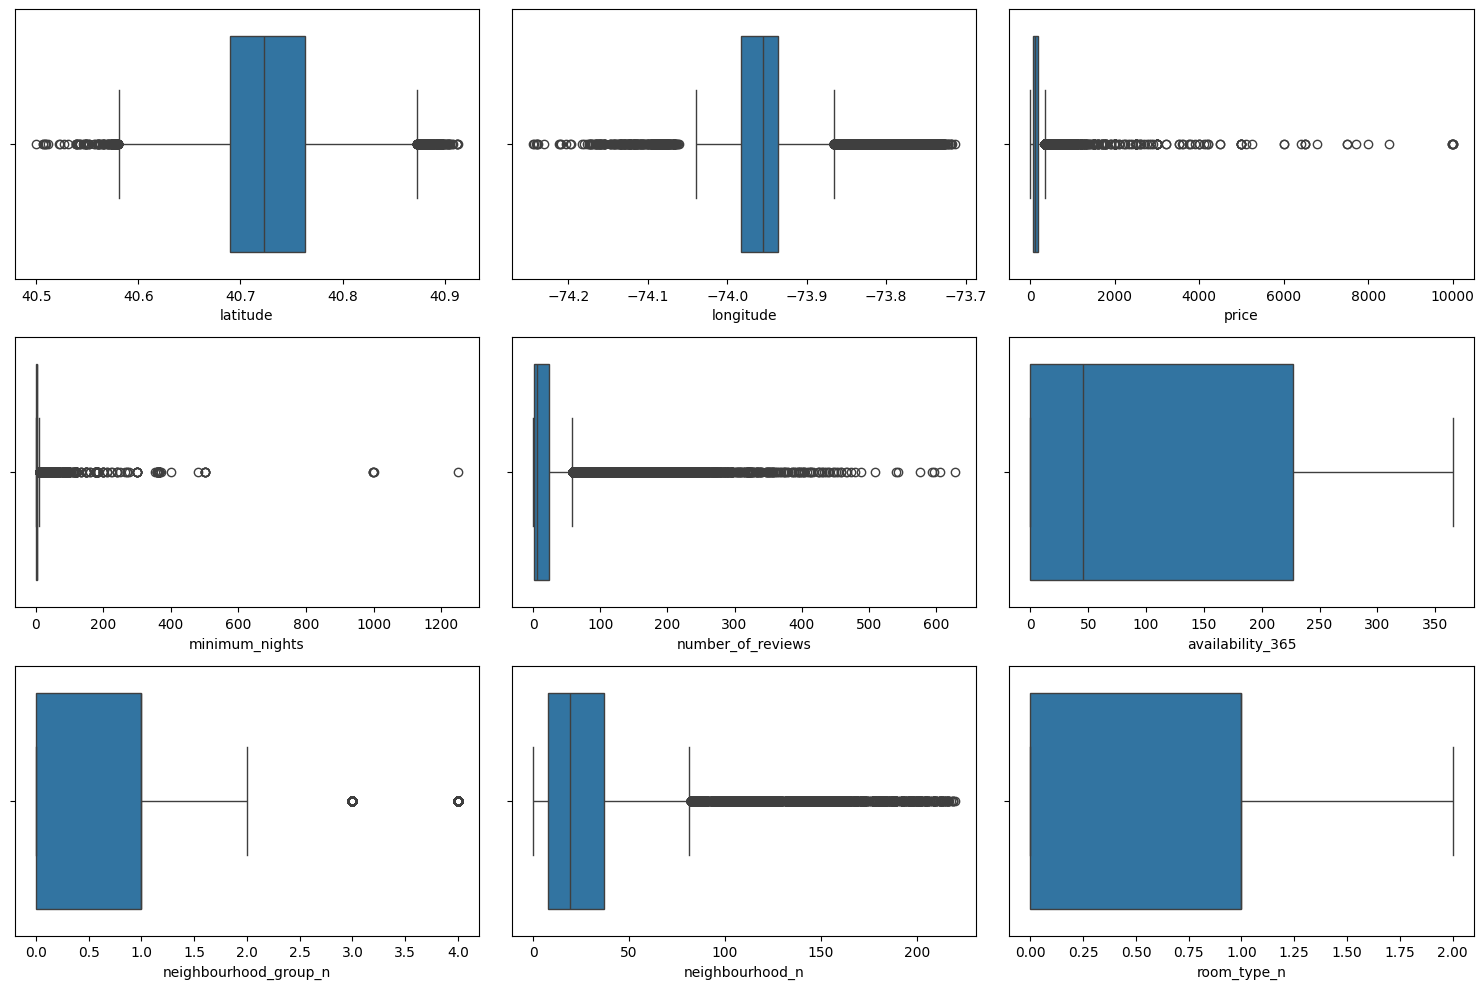

In [42]:

# Configuración del diseño de los subgráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

columns_to_plot = numericas.columns
print(columns_to_plot)

# Iterar sobre las columnas y crear los boxplots
for i, column in enumerate(columns_to_plot):

    if column == 'neighbourhood':

        # Si ploteamos neighbourhood le quitamos las y tick labels
        sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)
        axes[i // 3, i % 3].set_yticklabels([])

    sns.boxplot(ax=axes[i // 3, i % 3], data=clean_df, x=column)

plt.tight_layout()

plt.show()


Vemos que aunque el numero de reviews y el precio tienen muchos outliers, es algo normal ya que los usuarios pueden poner las reseñasy el precio que crean conveniente, sin embargo conocemos de un limite de noches minimas y se está atravesando por mucho, asi que reduciremos esos outliers

In [43]:
len(clean_df[clean_df['minimum_nights'] >60 ])

332

In [44]:
len(clean_df[clean_df['minimum_nights'] >30 ])

747

In [45]:
clean_df.drop(clean_df[clean_df['minimum_nights'] > 30].index,inplace=True)

In [46]:
clean_df[clean_df['minimum_nights'] >30 ]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n


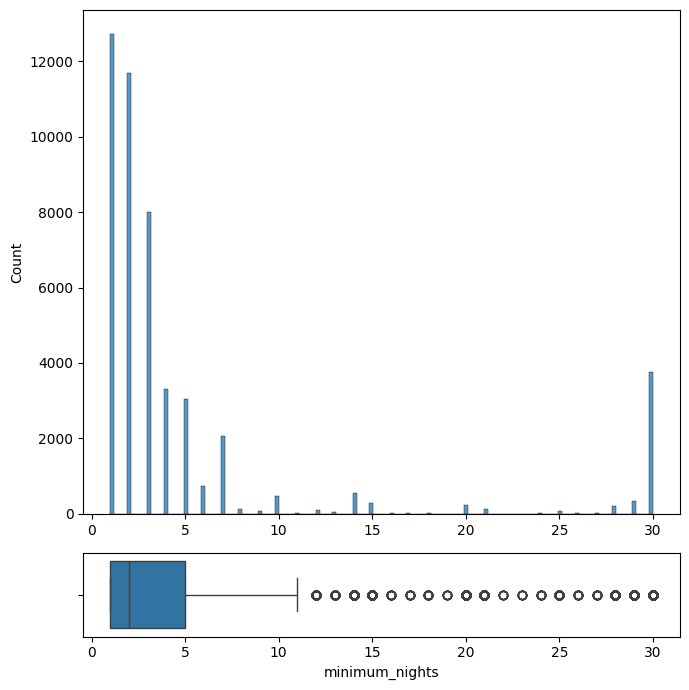

In [47]:
# Configuración del diseño de los subgráficos
fig, axis = plt.subplot_mosaic([['h1'],
                                ['b1']], figsize=(7, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis['h1'], data = clean_df, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis['b1'], data = clean_df, x = "minimum_nights")

plt.tight_layout()

plt.show()

In [48]:
print((747 / 48148) *100)
print((332 / 48148) *100)

1.5514663122040375
0.6895405832017945


Hemos destruido 747 filas (un 1.55% del dataframe), para eliminar los outliers que considerabamos, aunque podemos optar por ser mas conservadores y eliminar 'hasta los 60 dias minimos', donde eliminariamos solamente 332 filas (un 0.68% del dataframe)

4 . 2 . Analisis de nulos


In [49]:
clean_df.isnull().sum().sort_values(ascending=False)

neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_group_n    0
neighbourhood_n          0
room_type_n              0
dtype: int64

Para este dataset eliminamos las columnas que tenian nulos en una etapa anterior asi que no seria necesario un analisis de nulos.

4 . 3 Inferencia de nuevas caracteristicas

In [50]:
clean_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,4,1


Despues de investigar las columnas, no tenemos un resultado de que columnas inferir por lo que no es necesario

4 . 4 . Escalado de caracteristicas

Normalizamos de diferentes formas para visualizar los distintos tipos de normalización

Normalizacion:

In [51]:
numericas = clean_df.select_dtypes(include='number')

In [52]:
from sklearn.preprocessing import StandardScaler

num_variables = numericas.columns

scaler = StandardScaler()
norm_features = scaler.fit_transform(numericas[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = numericas.index, columns = num_variables)
total_data_norm["price"] = numericas["price"]
total_data_norm.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,-1.491209,-0.440153,149,-0.558244,-0.323547,1.929949,-0.930089,-0.861068,-1.042798
1,0.454175,-0.686408,225,-0.558244,0.481483,1.853747,0.252116,-0.832281,0.803719
2,1.469669,0.218036,150,-0.314453,-0.524805,1.929949,0.252116,-0.803493,-1.042798
3,-0.801077,-0.167762,89,-0.558244,5.512925,0.626897,-0.930089,-0.774705,0.803719
4,1.277018,0.172890,80,0.538815,-0.323547,-0.851420,0.252116,-0.745918,0.803719


Min-Max Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

num_variables = numericas.columns

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(numericas[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = numericas.index, columns = num_variables)
total_data_scal["price"] = numericas["price"]
total_data_scal.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,0.357393,0.511921,149,0.000000,0.014308,1.000000,0.00,0.000000,0.0
1,0.614199,0.490469,225,0.000000,0.071542,0.972603,0.25,0.004545,0.5
2,0.748252,0.569257,150,0.068966,0.000000,1.000000,0.25,0.009091,0.0
3,0.448496,0.535649,89,0.000000,0.429253,0.531507,0.00,0.013636,0.5
4,0.722820,0.565324,80,0.310345,0.014308,0.000000,0.25,0.018182,0.5


### 5 . 5 . Feature Selection

In [54]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_scal.drop("price", axis = 1)
y = total_data_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()


X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel

,minimum_nights,number_of_reviews,availability_365,neighbourhood_n,room_type_n
0,0.034483,0.004769,0.000000,0.204545,0.0
1,0.034483,0.015898,0.857534,0.027273,0.0
2,0.379310,0.000000,0.000000,0.086364,0.5
3,0.034483,0.007949,0.000000,0.054545,0.5
4,0.034483,0.131955,0.109589,0.018182,0.0
...,...,...,...,...,...
38513,0.000000,0.025437,0.945205,0.018182,0.0
38514,0.068966,0.004769,1.000000,0.359091,0.5
38515,1.000000,0.001590,0.904110,0.063636,0.5
38516,0.034483,0.124006,0.000000,0.050000,0.0


In [55]:
X_test_sel

,minimum_nights,number_of_reviews,availability_365,neighbourhood_n,room_type_n
0,0.000000,0.000000,0.000000,0.054545,0.0
1,0.034483,0.179650,0.539726,0.009091,0.5
2,0.000000,0.162162,0.002740,0.031818,0.0
3,0.068966,0.052464,0.000000,0.095455,0.0
4,0.206897,0.000000,0.246575,0.331818,0.0
...,...,...,...,...,...
9625,0.068966,0.000000,0.068493,0.027273,0.0
9626,0.068966,0.015898,0.000000,0.086364,0.5
9627,1.000000,0.017488,0.912329,0.031818,0.5
9628,0.068966,0.001590,0.000000,0.095455,0.0


Dentro de nuestro dataset tambien guardamos la target junto con las predictoras y deberemos recordar de sacarlas para trabajar con ellas mas adelante

In [56]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [57]:
X_train_sel.to_csv("../data/processed/airbnb_train.csv", index=False)
X_test_sel.to_csv("../data/processed/airbnb_test.csv", index=False)

Con estos datos y los csv exportados damos la exploración por concluida y ahora nos centraremos en aplicar modelos de machine learning para preveer tendencias futuras. Usaremos scikit-learn para esta tarea, hasta la vista ;))